# Week 2 Exercises
## Basic Semantic Technologies
* 2.1 How to Identify and Access Things
* 2.2 How to Represent Simple Facts with RDF
* 2.3 RDF Turtle Serialization
* 2.4 RDF Complex Data Structures
* 2.5 Model Building with RDFS
* 2.6 Logical Inference with RDF(S)
* Excursion 1: RDFa - RDF and the We

## 2.1 How to access things

In [7]:
!curl -L -H "Accept: text/html" http://dbpedia.org/resource/Earth

In [8]:
!curl -L -H "Accept: application/rdf+xml" http://dbpedia.org/resource/Earth

### Question 1
Select the correct statement(s) about the designatum.

* [ ] The designatum designates a webpage.
* [ ] The designatum is a resource.
* [ ] The designatum is described by the designator.
* [ ] The designatum is a representation of a resource.

### Question 2
What is a URI?

* [ ] A schema to identify what exists on the web.
* [ ] An identifier for a designatum.
* [ ] An identifier only for digital objects.
* [ ] An extension of the URL concept.
* [ ] The acronym for Universal Resource Identifier.
* [ ] A schema for identification of abstract or physical resources.

### Question 3
What is HTTP content negotiation?

* [ ] A mechanism to serve multiple representations at the same place.
* [ ] A mechanism to store a designator at the same place as the designatum.
* [ ] A mechanism to always serve the same representation at multiple places.

### Question 4
Which request(s) would cause the server to respond with `HTTP/2 303 See Other Location: http://dbpedia.org/data/Joseph_Fourier` ?

* [ ] `HTTP GET http://dbpedia.org/resource/Earth "Accept: image/jpg"`
* [ ] `HTTP POST http://dbpedia.org/resource/Joseph_Fourier Accept Header: application/rdf+xml`
* [ ] `HTTP GET http://dbpedia.org/resource/Joseph_Fourier Accept Header: application/rdf+xml`
* [ ] `HTTP GET http://dbpedia.org/resource/Joseph_Fourier Accept Header: text/*`

## 2.2 How to Represent simple Facts with RDF

In [11]:
fact="The Greenhouse Effect has been discovered in 1824"

`subject   predicate   object`

In [11]:
subject_="Greenhouse Effect"
predicate_="has been discovered in"
object_="1824"

In [71]:
#!pip install pyvis

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

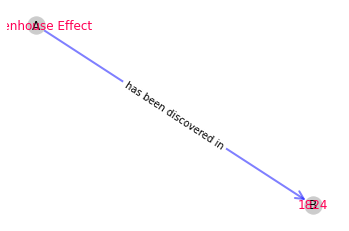

In [66]:
# TODO: make this prettier
G=nx.DiGraph()

# a graph is a list of nodes and edges
nodes = ['A', 'B']
edges = [('A', 'B')]
G.add_nodes_from(nodes)
G.add_edges_from(edges,label=predicate_)

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_color="#cccccc")
nx.draw_networkx_edges(G,pos,edgelist=edges,arrowstyle="->",arrowsize=20,width=2,alpha=0.5,edge_color='b')

# labels
labels = {'A':subject_, 'B':object_}
nx.draw_networkx_labels(G,pos,font_size=12,font_family='sans-serif')
nx.draw_networkx_labels(G,pos,font_size=12,font_color='#ff0055',font_family='sans-serif', labels=labels)

edgelabels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G,pos,edge_labels=edgelabels)

plt.axis('off')
plt.show()

### N-triples serialization
(predicate == property)

`subject [URI]   property [URI]   object [URI | literal] .`

Example:
`<http://dbpedia.org/resource/Greenhouse_effect> <http://dbpedia.org/ontology/discoveredIn> “1824” .`

### 2.2 RDF Triples examples:

```
<http://dbpedia.org/resource/Greenhouse_effect> <http://dbpedia.org/ontology/discoveredIn> “1824” .
<http://dbpedia.org/resource/Greenhouse_effect> <http://dbpedia.org/ontology/discoverer> <http://dbpedia.org/resource/Joseph_Fourier> .
<http://dbpedia.org/resource/Greenhouse_effect> <http://purl.org/dc/terms/subject> <http://dbpedia.org/category/Climate_change> .
<http://dbpedia.org/resource/Greenhouse_effect> <http://purl.org/dc/terms/subject> <http://dbpedia.org/category/Athmosphere> .
… … ...
<http://dbpedia.org/resource/Joseph_Fourier> <http://dbpedia.org/ontology/birthdate> “1768-03-21” .
<http://dbpedia.org/resource/Joseph_Fourier> <http://dbpedia.org/ontology/birthplace> <http://dbpedia.org/resource/Auxerre> .
<http://dbpedia.org/resource/Joseph_Fourier> <http://dbpedia.org/ontology/field> <http://dbpedia.org/resource/Physicist> .
… … ...
<http://dbpedia.org/resource/Auxerre> <http://dbpedia.org/ontology/country> <http://dbpedia.org/resource/France> .
<http://dbpedia.org/resource/Auxerre> <http://www.w3.org/2003/01/geo/wgs84_pos#lat> “47.798599”^^xsd:float .
<http://dbpedia.org/resource/Auxerre> <http://www.w3.org/2003/01/geo/wgs84_pos#long> “3.567200”^^xsd:float .
```

### RDF - Resourse Description Framework:
* Individuals (Entities) - *subject or object URI, ex: `<http://dbpedia.org/resource/Greenhouse_effect>`*
* Classes - *a category URI, ex: `<http://dbpedia.org/category/Athmosphere>`*
* Properties - *predicate URI, ex: `<http://dbpedia.org/ontology/birthdate>`*
* Literals - *objects like: `“47.798599”^^xsd:float`*
    * and untyped literals - like `"helloworld"`
* Vocabularies / Ontologies - *a set containing URIs and literals, ex: `http://www.w3.org/2003/01/geo/wgs84_pos`*
* __URIs__ identify and reference resources uniquely.
* __Literals__ describe data values that don’t have a separate existence.

See slides for details.

## 2.3 Turtle (Terse RDF Triple Language) Serialization
Provides shortcuts for making RDF easier to read.
* `@prefix` directive associates prefix-label with URI
* `@base` directive provides URI to complement all relative URIs
* `;` separates subject from property & object 
* `,` separates subject & property from object


Example in Turtle:
```
@prefix book: <http://semantic-web-book.org/> . 
@prefix ex: <http://example.org/> . 
@prefix crc: <http://crcpress.com/> .
book:uri ex:publishedBy crc:uri . 
book:uri ex:title "Foundations of Semantic Web Technologies" . 
crc:uri ex:name "CRC Press" .
```

### 2.3:Q1 Exercise: 
Rewite the N-triples in __2.2 RDF Examples__ using Turtle syntax, in the most compact way.   Use a validator to make sure your code is syntactically valid.   
* http://librdf.org/parse

### 2.3:Q2 Exercise: 
Multivalued relations can be defined using blank nodes `[]`. Blank nodes do not have any URI and are not accessible from outside. 

Write a Turtle definition for the following recipe (book fig. 2.7):   
Chutney has the ingredients:
    * mango, 1lb
    * cayene pepper, 1tsp
    
*HINT: it might be helpful to draw a diagram first, see slides 2.3 p.15*

### 2.3:Q3 Exercise:
Write the Turtle syntax which is equivalent to the below illustration. Notice the deferenceable blank nodes have ids which make them easier to reference from within a single graph.

<img src="ex2.3.png">

### 2.3:Q4 Discussion topics: 
* What are the pros and cons of using blank nodes? 
* Are there tools that convert between Turtle and RDF/XML?
    * see also: The W3C Validator is found at http://www.w3.org/RDF/Validator/

## 2.4 RDF Complex Data Structures
* __RDF lists__ - helper construct (syntactic sugar)
    * Containers - open lists which can be extended
        * Bag - unordered set
        * Seq - ordered set
        * Alt - alternative
        * A container is a blank node like: `ex:contain [a rdf:Bag ; ... ]` 
    * Collections - closed lists like a *linked list* in OOP which has a *Head* and a *Tail*
        * A collection is defined by `ex:contain (...)`


* __Reification__ - statements about statements
    * a triple represented as an entity: `rdf:Statement`
    * Uses:
        * Provenance
        * Reliability/Trust
        * Metadata
    * Gotchas:
        * Type conflicts
        * infinte loops
        

### 2.4:Q1 
*(book Exercise 2.5)*    
Decide whether the following propositions can be satisfactorily modeled in RDFS and, if so, give the corresponding RDF(S) specification.
* Every pizza is a meal. 
* Pizzas always have at least two toppings. 
* Every pizza from the class PizzaMargarita has a Tomato topping. 
* Everything having a topping is a pizza.
* No pizza from the class PizzaMargarita has a topping from the class Meat.
* “Having a topping” is a containedness relation.

### 2.4:Q2
*(book Exercise 2.4)*  
Represent the following sentences graphically by means of reified triples:
* Romeo thought that Juliet was dead. 
* John believes that Mary wants to marry him. 
* The dwarf noticed that somebody had been eating from his plate.


## 2.5 Model Building with RDFS

### Semantic expressivity - "meaning"
#### RDF Schema - RDF Vocabulary Description Language
RDF is extended to the *ontology language* RDF Schema (RDFS)
* Classes and class instantiation
* Properties with domain and range restrictions
* Everything in RDF is an RDF Resource

Example:
```
ex:Textbook rdf:type rdfs:Class . 
book:uri rdf:type ex:Textbook . 
ex:Textbook rdfs:subClassOf ex:Book . 
ex:Book rdfs:subClassOf ex:PrintMedia .
ex:Journal rdfs:subClassOf ex:PrintMedia .

rdfs:Class rdf:type rdfs:Class . 
```
__Notational convention:__ URIs representing classes are usually capitalized, whereas names for instances and properties are written in lower case.

### 2.5:Q1
Using the above example,    
    1) write a triple which illustrates the *transitive* relationship    
    2) write a triple which illustrates the *reflexive* relationship    
    3) provide an example which illustrates *extensionally equivalent* classes   

### 2.5:Q2
Domain and range restrictions constitute the “semantic link” between classes and properties.    

Given the triple: `a ex:isMarriedTo b .`, write the domain and range restrictions for `isMarriedTo` which will allow us to assert that both `a` and `b` are of `rdf:type ex:Person`

## 2.6 Logical Inference with RDF(S)
* __Formal semantics__ the logical dimension of the notion of semantics. Allows us to draw sound and valid logical inferences
* First Order Logic

## 2.7 Excursion 1 RDFa - RDF on the Web
* Microformats - use native html markup like `class`, `span`, etc., ex: `<div class="vcard"`>
* RDFa - RDF in html __a__ttributes like `href`, `src`, `vocab`, etc. ex: `<p vocab="http//xmlns.com/foaf/0.1/" typeof="Person">`
* HTML5 and schema.org

### 2.7:Q1 Discussion topic:
* Obstacles to adoption 

### 2.7:Q2 Discussion topic:
* RDFa for SEO

## See also
There are also very good exercises and projects at the end of Chapter 2 of A Semantic Web Primer.